In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Data fields
Here's a brief version of what you'll find in the data description file.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [3]:
df.dtypes[:].reset_index(None).groupby([0]).agg(['count'])

,index
,count
0,
int64,35
float64,3
object,43


### Initial Selection Criteria, Most correlated variables

In [51]:
y = df["SalePrice"]

In [52]:
y.shape

(1460,)

Most Correlated String Variables

In [5]:
string_dtypes = df.convert_dtypes().select_dtypes("string")
string_dtypes = string_dtypes.fillna("na")
names = string_dtypes.columns

In [6]:
enc = OrdinalEncoder()
string_dtypes = enc.fit_transform(string_dtypes)

In [7]:
string_dtypes[:,1]

array([1., 1., 1., ..., 1., 1., 1.])

In [8]:
str_corr=[]
for i in range(string_dtypes.shape[1]):
    str_corr.append(np.corrcoef(np.array(y),string_dtypes[:,i])[0,1])

In [9]:
str_corr
selected = [i for i in range(len(str_corr)) if abs(str_corr[i])>.20]

In [10]:
names[selected]

Index(['LotShape', 'Neighborhood', 'RoofStyle', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'PavedDrive', 'SaleCondition'],
      dtype='object')

Most Correlated Numeric Variables

In [11]:
numeric_dtypes = df.convert_dtypes().select_dtypes(["float", "integer"])
names_num = numeric_dtypes.columns

In [12]:
numeric_dtypes.isna().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

Few vars have NA value. Will impute those vars. 

In [13]:
numeric_dtypes['LotFrontage'] =  numeric_dtypes['LotFrontage'].fillna(value = numeric_dtypes['LotFrontage'].mode()[0])
numeric_dtypes['MasVnrArea'] =  numeric_dtypes['MasVnrArea'].fillna(value = numeric_dtypes['MasVnrArea'].mode()[0])
numeric_dtypes['GarageYrBlt'] =  numeric_dtypes['GarageYrBlt'].fillna(numeric_dtypes['YearBuilt'])


(array([205., 902., 298.,  40.,   9.,   4.,   0.,   0.,   0.,   2.]),
 array([21.0, 50.2, 79.4, 108.6, 137.8, 167.0, 196.2, 225.4, 254.6, 283.8,
        313.0], dtype=object),
 <BarContainer object of 10 artists>)

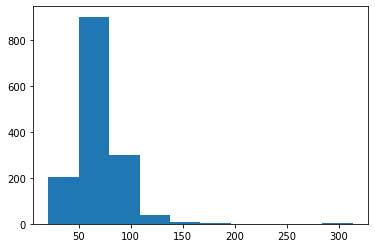

In [14]:
plt.hist(numeric_dtypes['LotFrontage'])

(array([1.085e+03, 2.190e+02, 9.400e+01, 2.900e+01, 1.900e+01, 6.000e+00,
        4.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([0.0, 160.0, 320.0, 480.0, 640.0, 800.0, 960.0, 1120.0, 1280.0,
        1440.0, 1600.0], dtype=object),
 <BarContainer object of 10 artists>)

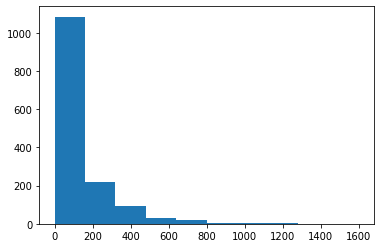

In [15]:
plt.hist(numeric_dtypes['MasVnrArea'])

(array([  2.,   0.,  16.,  76.,  71., 114., 266., 243., 187., 485.]),
 array([1872.0, 1885.8, 1899.6, 1913.4, 1927.2, 1941.0, 1954.8, 1968.6,
        1982.4, 1996.2, 2010.0], dtype=object),
 <BarContainer object of 10 artists>)

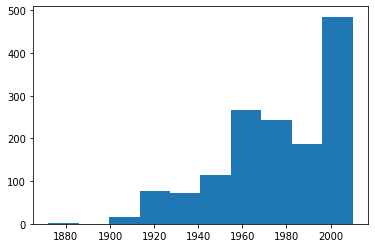

In [16]:
plt.hist(numeric_dtypes['GarageYrBlt'])

In [18]:
int_corr=[]
for i in range(numeric_dtypes.shape[1]):
    int_corr.append(np.corrcoef(np.array(y),np.array(numeric_dtypes,dtype=float)[:,i])[0,1])

In [19]:
int_corr
selected_num = [i for i in range(len(int_corr)) if abs(int_corr[i])>.20]

In [20]:
names_num[selected_num]

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

### Exploring variables

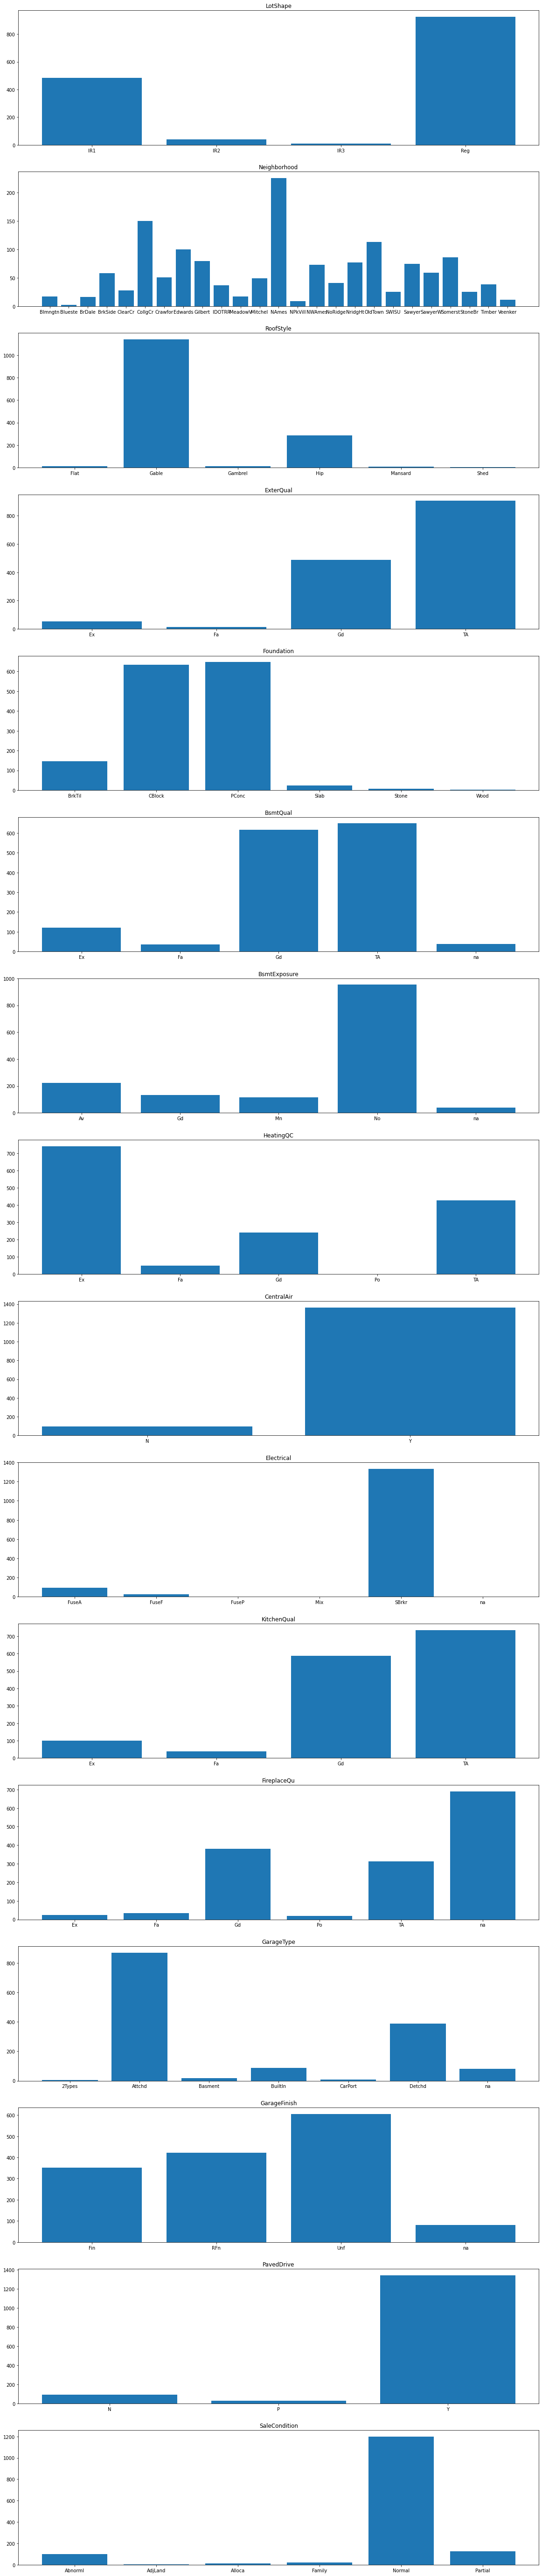

In [47]:
fig, axs = plt.subplots(len(names[selected]),figsize=[20, 100.8])
for i in range(len(names[selected])):
    df[names[selected][i]] = df[names[selected][i]].fillna("na")
    labels, counts = np.unique(df[names[selected][i]],return_counts=True)
    ticks = range(len(counts))
    axs[i].bar(ticks,counts, align='center')
    axs[i].set_title(names[selected][i])
    axs[i].set_xticks(ticks)
    axs[i].set_xticklabels(labels)
fig.show() 

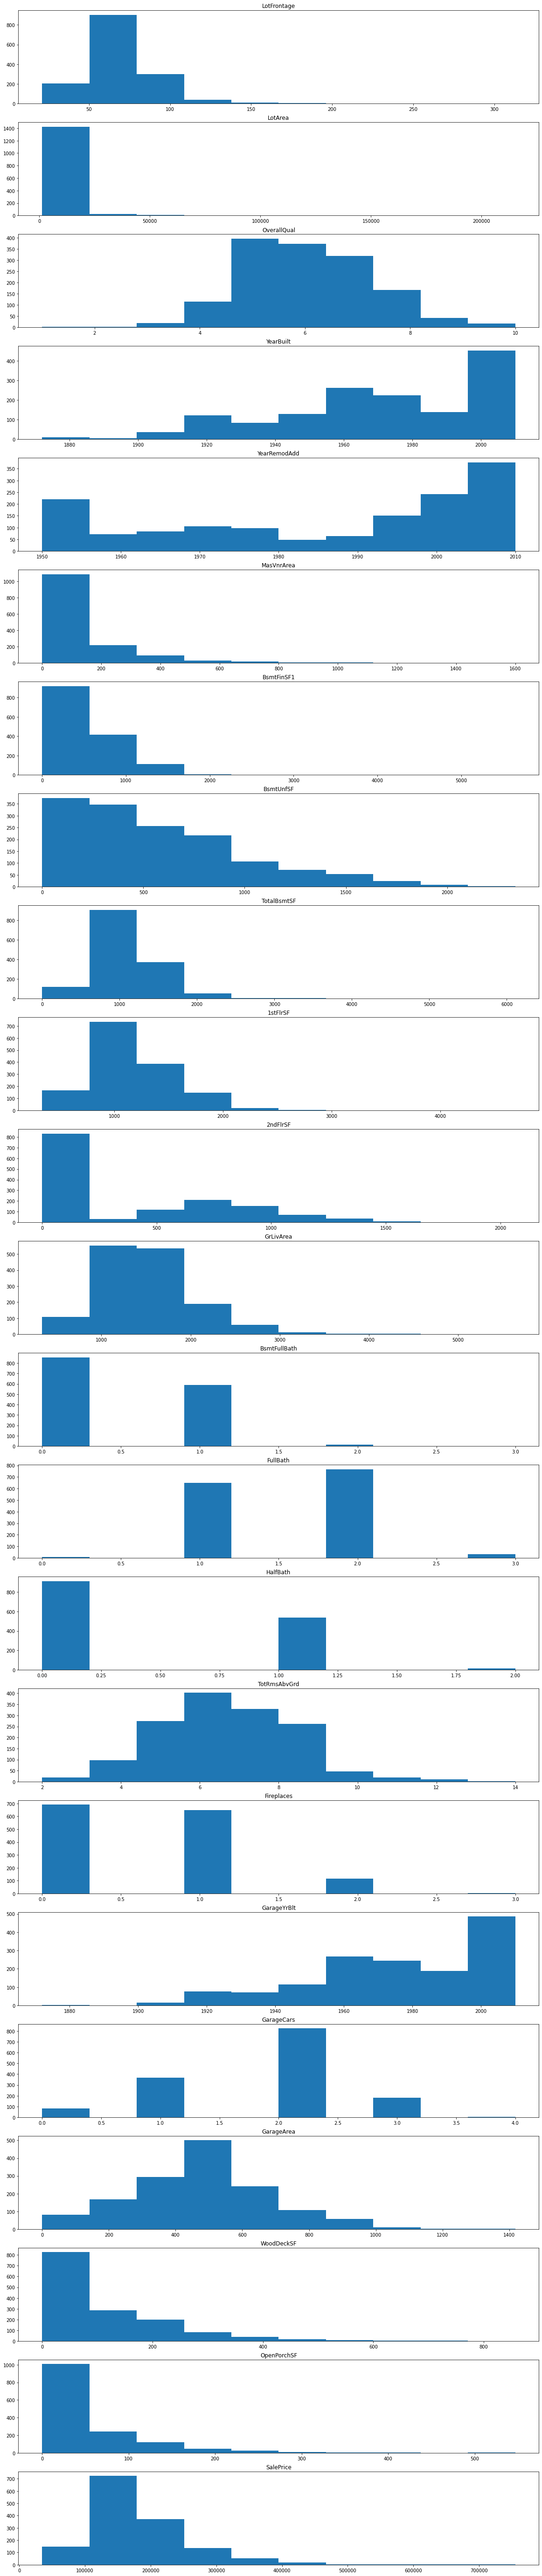

In [54]:
fig, axs = plt.subplots(len(names_num[selected_num]),figsize=[20, 100.8])
numeric_dtypes = df.convert_dtypes().select_dtypes(["float", "integer"])
numeric_dtypes['LotFrontage'] =  numeric_dtypes['LotFrontage'].fillna(value = numeric_dtypes['LotFrontage'].mode()[0])
numeric_dtypes['MasVnrArea'] =  numeric_dtypes['MasVnrArea'].fillna(value = numeric_dtypes['MasVnrArea'].mode()[0])
numeric_dtypes['GarageYrBlt'] =  numeric_dtypes['GarageYrBlt'].fillna(numeric_dtypes['YearBuilt'])
#fig.figsize=[6.4, 100.8]
for i in range(len(names_num[selected_num])):
    axs[i].hist(numeric_dtypes[names_num[selected_num][i]])
    axs[i].set_title(names_num[selected_num][i])
fig.show() 

Special Analysis for Sale Price

Text(0.5, 1.0, 'SalePrice')

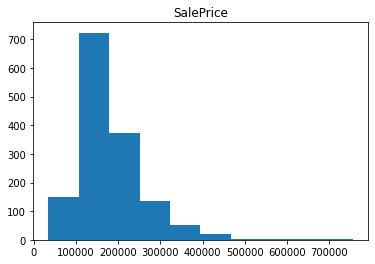

In [56]:
plt.hist(y)
plt.title("SalePrice")

In [57]:
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Variables to Keep Will be:


'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
'2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
'WoodDeckSF', 'OpenPorchSF', 'SalePrice','Id','LotShape', 'Neighborhood', 
'RoofStyle', 'ExterQual', 'Foundation','BsmtQual', 'BsmtExposure', 'HeatingQC', 
'CentralAir', 'Electrical','KitchenQual', 'FireplaceQu', 'GarageType', 
'GarageFinish','PavedDrive', 'SaleCondition'
